In [7]:
# This script is used to analyze the energy consumption of the Pet Clinic system
import os
import csv
from datetime import datetime

# Paths
log_file_path_coarse = '../../result_f/pet/coarse/clean_powerstat_20240728_082507.txt'
log_file_path_med = '../../result_f/pet/med/cleaned_powerstat_20240728_150504.txt'
log_file_path_fine = '../../result_f/pet/fine/clean_powerstat_20240728_180603.txt'
csv_folder_path_coarse = '../pet_f/coarse/'
csv_folder_path_med = '../pet_f/med/'
csv_folder_path_fine = '../pet_f/fine/'


def parse_log_timestamp(log_timestamp):
    return datetime.strptime(log_timestamp, '%H:%M:%S').time()
def parse_csv_timestamp(csv_timestamp):
    return datetime.strptime(csv_timestamp.split(',')[0], '%Y-%m-%d %H:%M:%S').time()

log_entries_coarse = []
log_entries_med = []
log_entries_fine = []

with open(log_file_path_coarse, 'r') as log_file:
    for line in log_file:
        parts = line.strip().split()
        timestamp = parse_log_timestamp(parts[0])
        last_value = float(parts[-1])
        log_entries_coarse.append((timestamp, last_value))

with open(log_file_path_med, 'r') as log_file:
    for line in log_file:
        parts = line.strip().split()
        timestamp = parse_log_timestamp(parts[0])
        last_value = float(parts[-1])
        log_entries_med.append((timestamp, last_value))

with open(log_file_path_fine, 'r') as log_file:
    for line in log_file:
        parts = line.strip().split()
        timestamp = parse_log_timestamp(parts[0])
        last_value = float(parts[-1])
        log_entries_fine.append((timestamp, last_value))

results_coarse = []
results_med = []
results_fine = []

for csv_file_name in os.listdir(csv_folder_path_coarse):
    if csv_file_name.endswith('.csv'):
        csv_file_path = os.path.join(csv_folder_path_coarse, csv_file_name)

        with open(csv_file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            headers = next(csv_reader)
            first_csv_timestamp_str = next(csv_reader)[0]
            first_csv_timestamp = parse_csv_timestamp(first_csv_timestamp_str)
            log_index = -1
            for i, (log_timestamp, _) in enumerate(log_entries_coarse):
                if log_timestamp > first_csv_timestamp:
                    log_index = i
                    break
            if log_index == -1:
                results_coarse.append((first_csv_timestamp_str, csv_file_name, None, None))
                continue
            sum_last_values = 0.0
            for i in range(log_index, min(log_index + 12, len(log_entries_coarse))):
                sum_last_values += log_entries_coarse[i][1]
            results_coarse.append((first_csv_timestamp_str, csv_file_name, log_entries_coarse[log_index][0], sum_last_values))

for csv_file_name in os.listdir(csv_folder_path_med):
    if csv_file_name.endswith('.csv'):
        csv_file_path = os.path.join(csv_folder_path_med, csv_file_name)

        with open(csv_file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            headers = next(csv_reader)
            first_csv_timestamp_str = next(csv_reader)[0]
            first_csv_timestamp = parse_csv_timestamp(first_csv_timestamp_str)
            log_index = -1
            for i, (log_timestamp, _) in enumerate(log_entries_med):
                if log_timestamp > first_csv_timestamp:
                    log_index = i
                    break
            if log_index == -1:
                results_med.append((first_csv_timestamp_str, csv_file_name, None, None))
                continue
            sum_last_values = 0.0
            for i in range(log_index, min(log_index + 12, len(log_entries_med))):
                sum_last_values += log_entries_med[i][1]
            results_med.append((first_csv_timestamp_str, csv_file_name, log_entries_med[log_index][0], sum_last_values))

for csv_file_name in os.listdir(csv_folder_path_fine):
    if csv_file_name.endswith('.csv'):
        csv_file_path = os.path.join(csv_folder_path_fine, csv_file_name)

        with open(csv_file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            headers = next(csv_reader)
            first_csv_timestamp_str = next(csv_reader)[0]
            first_csv_timestamp = parse_csv_timestamp(first_csv_timestamp_str)
            log_index = -1
            for i, (log_timestamp, _) in enumerate(log_entries_fine):
                if log_timestamp > first_csv_timestamp:
                    log_index = i
                    break
            if log_index == -1:
                results_fine.append((first_csv_timestamp_str, csv_file_name, None, None))
                continue
            sum_last_values = 0.0
            for i in range(log_index, min(log_index + 12, len(log_entries_fine))):
                sum_last_values += log_entries_fine[i][1]
            results_fine.append((first_csv_timestamp_str, csv_file_name, log_entries_fine[log_index][0], sum_last_values))

results_coarse.sort(key=lambda x: parse_csv_timestamp(x[0]))
results_med.sort(key=lambda x: parse_csv_timestamp(x[0]))
results_fine.sort(key=lambda x: parse_csv_timestamp(x[0]))


for i in range(len(results_coarse)):
    results_coarse[i] = (results_coarse[i][0], results_coarse[i][1], results_coarse[i][2], results_coarse[i][3] * 10)
    print(results_coarse[i])
for i in range(len(results_med)):
    results_med[i] = (results_med[i][0], results_med[i][1], results_med[i][2], results_med[i][3] * 10)
for i in range(len(results_fine)):
    results_fine[i] = (results_fine[i][0], results_fine[i][1], results_fine[i][2], results_fine[i][3] * 10)

for csv_timestamp, csv_file_name, log_timestamp, sum_last_values in results_coarse:
    if log_timestamp is None:
        print(f"For CSV file '{csv_file_name}': No valid log entry found.")
    else:
        print(f"For CSV file '{csv_file_name}':")
        print(f"  Corresponding log timestamp: {log_timestamp}")
        print(f"  Sum of last values: {sum_last_values}")

print("---------------------------MED-----------------------------------")
for csv_timestamp, csv_file_name, log_timestamp, sum_last_values in results_med:
    if log_timestamp is None:
        print(f"For CSV file '{csv_file_name}': No valid log entry found.")
    else:
        print(f"For CSV file '{csv_file_name}':")
        print(f"  Corresponding log timestamp: {log_timestamp}")
        print(f"  Sum of last values: {sum_last_values}")

print("----------------------------FINE--------------------------------")
for csv_timestamp, csv_file_name, log_timestamp, sum_last_values in results_fine:
    if log_timestamp is None:
        print(f"For CSV file '{csv_file_name}': No valid log entry found.")
    else:
        print(f"For CSV file '{csv_file_name}':")
        print(f"  Corresponding log timestamp: {log_timestamp}")
        print(f"  Sum of last values: {sum_last_values}")


('2024-07-28 08:25:10,375', 'locustfile_burst_high_0.01_400_40_10s_1_requests.csv', datetime.time(8, 25, 17), 3688.2999999999993)
('2024-07-28 08:27:30,365', 'locustfile_burst_high_0.01_400_40_10s_2_requests.csv', datetime.time(8, 27, 37), 3573.6000000000004)
('2024-07-28 08:29:50,335', 'locustfile_burst_high_0.01_400_40_10s_3_requests.csv', datetime.time(8, 29, 57), 3483.8000000000006)
('2024-07-28 08:32:10,451', 'locustfile_burst_high_0.01_400_40_10s_4_requests.csv', datetime.time(8, 32, 17), 3472.8999999999996)
('2024-07-28 08:34:30,468', 'locustfile_burst_high_0.01_400_40_10s_5_requests.csv', datetime.time(8, 34, 37), 3464.2000000000003)
('2024-07-28 08:36:50,548', 'locustfile_burst_high_0.01_400_40_10s_6_requests.csv', datetime.time(8, 36, 57), 3509.7)
('2024-07-28 08:39:10,513', 'locustfile_burst_high_0.01_400_40_10s_7_requests.csv', datetime.time(8, 39, 17), 3447.000000000001)
('2024-07-28 08:41:30,623', 'locustfile_burst_high_0.01_400_40_10s_8_requests.csv', datetime.time(8, 41

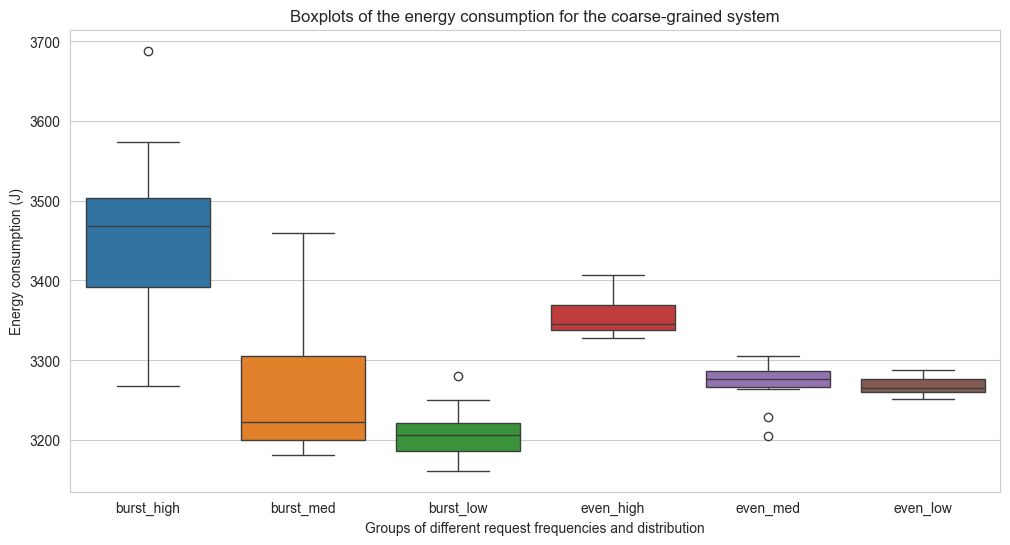

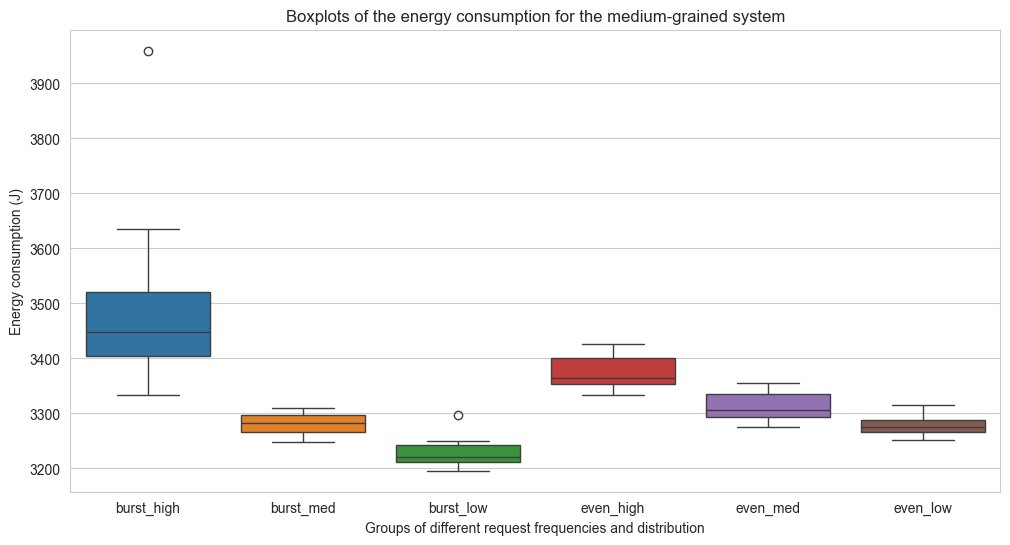

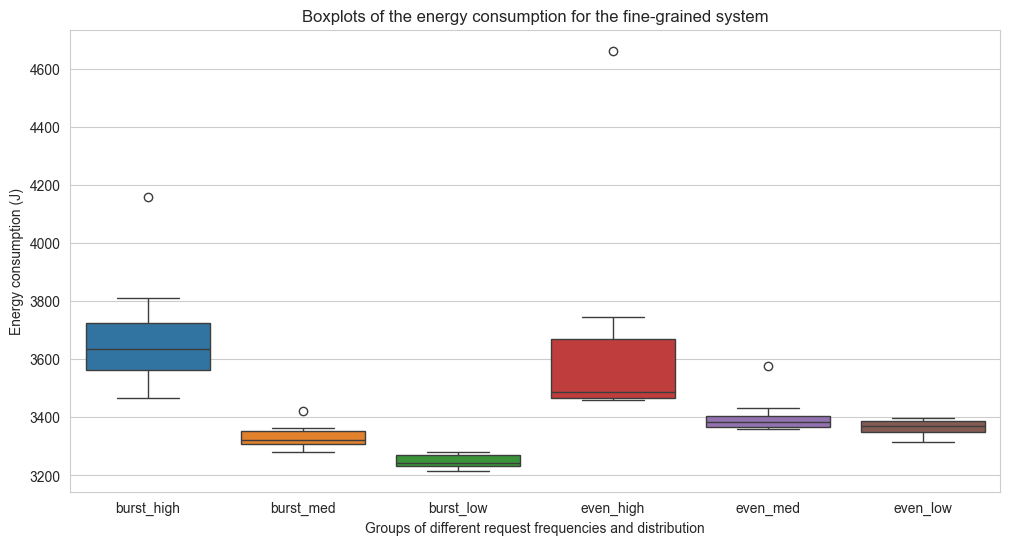

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sums = [sum_last_values for _, _, _, sum_last_values in results_coarse if sum_last_values is not None]
grouped_sums = [sums[i:i+10] for i in range(0, len(sums), 10)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=grouped_sums)

x_labels = ["burst_high","burst_med","burst_low","even_high","even_med","even_low"]
plt.xticks(ticks=range(len(grouped_sums)), labels=x_labels)
plt.title('Boxplots of the energy consumption for the coarse-grained system')
plt.xlabel('Groups of different request frequencies and distribution')
plt.ylabel('Energy consumption (J)')
plt.show()

sums = [sum_last_values for _, _, _, sum_last_values in results_med if sum_last_values is not None]
grouped_sums = [sums[i:i+10] for i in range(0, len(sums), 10)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=grouped_sums)
x_labels = ["burst_high","burst_med","burst_low","even_high","even_med","even_low"]
plt.title('Boxplots of the energy consumption for the medium-grained system')
plt.xlabel('Groups of different request frequencies and distribution')
plt.ylabel('Energy consumption (J)')
plt.xticks(ticks=range(len(grouped_sums)), labels=x_labels)
plt.show()

sums = [sum_last_values for _, _, _, sum_last_values in results_fine if sum_last_values is not None]
grouped_sums = [sums[i:i+10] for i in range(0, len(sums), 10)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=grouped_sums)
x_labels = ["burst_high","burst_med","burst_low","even_high","even_med","even_low"]
plt.xticks(ticks=range(len(grouped_sums)), labels=x_labels)
plt.title('Boxplots of the energy consumption for the fine-grained system')
plt.xlabel('Groups of different request frequencies and distribution')
plt.ylabel('Energy consumption (J)')
plt.show()

/var/folders/n3/t4x6rcxd63361_hz54mh10qh0000gn/T/ipykernel_66911/2170140753.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x_labels)
/var/folders/n3/t4x6rcxd63361_hz54mh10qh0000gn/T/ipykernel_66911/2170140753.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(x_labels)
/var/folders/n3/t4x6rcxd63361_hz54mh10qh0000gn/T/ipykernel_66911/2170140753.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(x_labels)


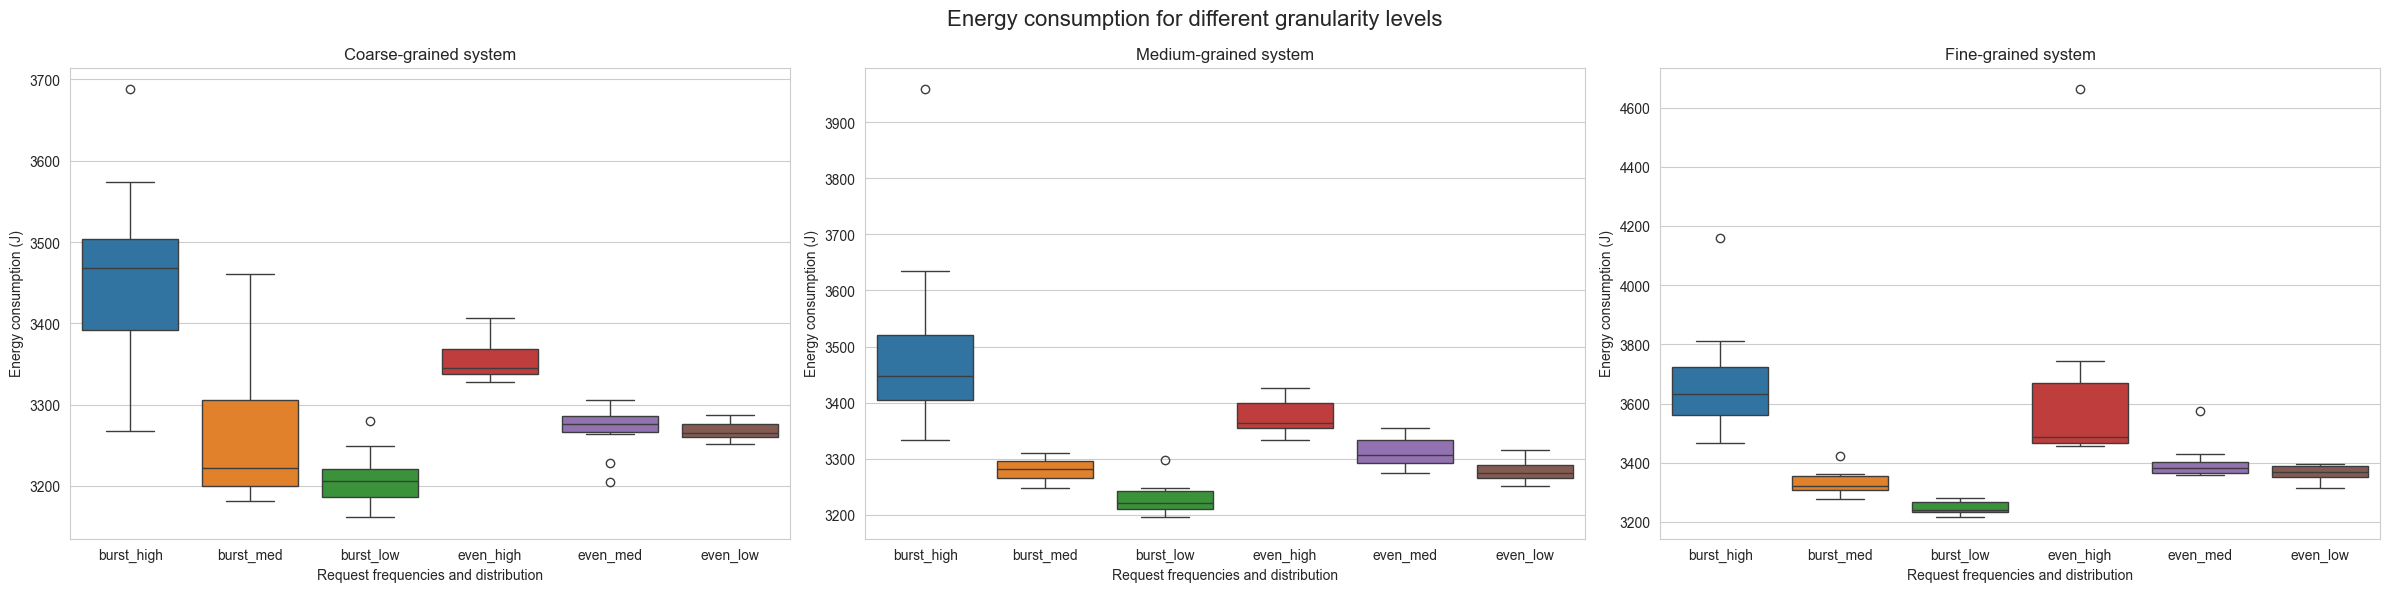

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 3 subplots in one row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# Define x-labels
x_labels = ["burst_high", "burst_med", "burst_low", "even_high", "even_med", "even_low"]

# Coarse-grained system
sums_coarse = [sum_last_values for _, _, _, sum_last_values in results_coarse if sum_last_values is not None]
grouped_sums_coarse = [sums_coarse[i:i+10] for i in range(0, len(sums_coarse), 10)]
sns.boxplot(data=grouped_sums_coarse, ax=ax1)
ax1.set_xticklabels(x_labels)
ax1.set_title('Coarse-grained system')
ax1.set_xlabel('Request frequencies and distribution')
ax1.set_ylabel('Energy consumption (J)')

# Medium-grained system
sums_med = [sum_last_values for _, _, _, sum_last_values in results_med if sum_last_values is not None]
grouped_sums_med = [sums_med[i:i+10] for i in range(0, len(sums_med), 10)]
sns.boxplot(data=grouped_sums_med, ax=ax2)
ax2.set_xticklabels(x_labels)
ax2.set_title('Medium-grained system')
ax2.set_xlabel('Request frequencies and distribution')
ax2.set_ylabel('Energy consumption (J)')

# Fine-grained system
sums_fine = [sum_last_values for _, _, _, sum_last_values in results_fine if sum_last_values is not None]
grouped_sums_fine = [sums_fine[i:i+10] for i in range(0, len(sums_fine), 10)]
sns.boxplot(data=grouped_sums_fine, ax=ax3)
ax3.set_xticklabels(x_labels)
ax3.set_title('Fine-grained system')
ax3.set_xlabel('Request frequencies and distribution')
ax3.set_ylabel('Energy consumption (J)')

# Add a main title for the entire figure
fig.suptitle('Energy consumption for different granularity levels', fontsize=16)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def find_outliers_3sigma(data):
    mean = np.mean(data)
    std = np.std(data)
    outliers = [x for x in data if (x < mean - 3*std) or (x > mean + 3*std)]
    return outliers
x_labels = ["burst_high", "burst_med", "burst_low", "even_high", "even_med", "even_low"]

# Function to find and print outliers
def print_outliers(data, system_name):
    print(f"\nOutliers for {system_name}:")
    for i, group in enumerate(data):
        outliers = find_outliers_3sigma(group)
        if outliers:
            print(f"  {x_labels[i]}: {outliers}")
        else:
            print(f"  {x_labels[i]}: No outliers")

# Coarse-grained system
sums_coarse = [sum_last_values for _, _, _, sum_last_values in results_coarse if sum_last_values is not None]
grouped_sums_coarse = [sums_coarse[i:i+10] for i in range(0, len(sums_coarse), 10)]
print_outliers(grouped_sums_coarse, "Coarse-grained system")

# Medium-grained system
sums_med = [sum_last_values for _, _, _, sum_last_values in results_med if sum_last_values is not None]
grouped_sums_med = [sums_med[i:i+10] for i in range(0, len(sums_med), 10)]
print_outliers(grouped_sums_med, "Medium-grained system")

# Fine-grained system
sums_fine = [sum_last_values for _, _, _, sum_last_values in results_fine if sum_last_values is not None]
grouped_sums_fine = [sums_fine[i:i+10] for i in range(0, len(sums_fine), 10)]
print_outliers(grouped_sums_fine, "Fine-grained system")


Outliers for Coarse-grained system:
  burst_high: No outliers
  burst_med: No outliers
  burst_low: No outliers
  even_high: No outliers
  even_med: No outliers
  even_low: No outliers

Outliers for Medium-grained system:
  burst_high: No outliers
  burst_med: No outliers
  burst_low: No outliers
  even_high: No outliers
  even_med: No outliers
  even_low: No outliers

Outliers for Fine-grained system:
  burst_high: No outliers
  burst_med: No outliers
  burst_low: No outliers
  even_high: No outliers
  even_med: No outliers
  even_low: No outliers


In [14]:
import numpy as np

def calculate_stats(data):
    return {
        "min": np.min(data),
        "max": np.max(data),
        "avg": np.mean(data),
        "std": np.std(data),
        "med": np.median(data),
        "q1": np.percentile(data, 25),
        "q3": np.percentile(data, 75)
    }

def find_outliers_3sigma(data):
    mean, std = np.mean(data), np.std(data)
    return [x for x in data if abs(x - mean) > 3 * std]

def analyze_system(results, name):
    sums = [sum_last_values for _, _, _, sum_last_values in results if sum_last_values is not None]
    stats = calculate_stats(sums)
    outliers = find_outliers_3sigma(sums)

    print(f"\n{name} system:")
    for stat, value in stats.items():
        print(f"  {stat}: {value:.2f}")
    print(f"  Outliers: {outliers if outliers else 'None'}")

# Analyze each system
analyze_system(results_coarse, "Coarse-grained")
analyze_system(results_med, "Medium-grained")
analyze_system(results_fine, "Fine-grained")


Coarse-grained system:
  min: 3161.60
  max: 3688.30
  avg: 3303.39
  std: 102.99
  med: 3278.15
  q1: 3228.78
  q3: 3343.62
  Outliers: [3688.2999999999993]

Medium-grained system:
  min: 3195.80
  max: 3959.40
  avg: 3328.89
  std: 115.85
  med: 3297.30
  q1: 3267.87
  q3: 3354.50
  Outliers: [3959.4000000000005]

Fine-grained system:
  min: 3215.90
  max: 4663.30
  avg: 3446.30
  std: 232.28
  med: 3381.95
  q1: 3316.88
  q3: 3483.97
  Outliers: [4157.799999999999, 4663.3]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Assuming results_coarse, results_med, and results_fine are defined earlier in your code

sums_coarse = [sum_last_values for *_, sum_last_values in results_coarse if sum_last_values is not None]
sums_med = [sum_last_values for *_, sum_last_values in results_med if sum_last_values is not None]
sums_fine = [sum_last_values for *_, sum_last_values in results_fine if sum_last_values is not None]
sums = sums_coarse + sums_med + sums_fine

def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

groups = list(chunks(sums, 10))
statistics = []
for group in groups:
    min_val = np.min(group)
    std_val = np.std(group)
    quatertile_1 = np.percentile(group, 25)
    quatertile_3 = np.percentile(group, 75)
    max_val = np.max(group)
    avg_val = np.mean(group)
    statistics.append((min_val, max_val, avg_val, std_val, quatertile_1, quatertile_3))

x_labels = ["coarse_burst_high","coarse_burst_med","coarse_burst_low","coarse_even_high","coarse_even_med","coarse_even_low",
            "med_burst_high","med_burst_med","med_burst_low","med_even_high","med_even_med","med_even_low",
            "fine_burst_high","fine_burst_med","fine_burst_low","fine_even_high","fine_even_med","fine_even_low"]

for i, (min_val, max_val, avg_val, std_val, quatertile_1, quatertile_3) in enumerate(statistics):
    print(f"{x_labels[i]}: Min = {min_val}, Max = {max_val}, Average = {avg_val}, Std = {std_val}, Q1 = {quatertile_1}, Q3 = {quatertile_3}")

averages = [stat[2] for stat in statistics]
bar_positions = np.arange(1, len(averages) + 1) * 1.7

# Define colors for each group
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'] * 3

# Create PDF
pdf_filename = 'energy_consumption_visualization.pdf'
with PdfPages(pdf_filename) as pdf:
    plt.figure(figsize=(15, 8), dpi=300)
    bars = plt.bar(bar_positions, averages, width=0.6, color=colors)
    plt.xlabel('Group', fontsize=12)
    plt.ylabel('Average Energy Consumption (J)', fontsize=12)
    plt.title('Average Energy Consumption for Pet Clinic System', fontsize=14)
    plt.xticks(bar_positions, x_labels, rotation=45, ha='right', fontsize=8)
    plt.ylim(min(averages) - 150, max(averages) + 10)

    line_positions = [3144.9, 3176.1, 3218.9]
    line_labels = ['coarse', 'med', 'fine']
    line_colors = ['red', 'green', 'blue']
    for y, label, color in zip(line_positions, line_labels, line_colors):
        plt.axhline(y=y, color=color, linestyle='--')
        plt.text(bar_positions[-1] + 0.5, y, label, color=color, va='center', fontsize=10)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    pdf.savefig(bbox_inches='tight')
    plt.close()

print(f"PDF saved as {pdf_filename}")

coarse_burst_high: Min = 3267.7, Max = 3688.2999999999993, Average = 3461.04, Std = 113.93021723844817, Q1 = 3391.5, Q3 = 3503.225
coarse_burst_med: Min = 3181.5, Max = 3460.1, Average = 3259.17, Std = 85.17345889418836, Q1 = 3199.3250000000003, Q3 = 3305.1500000000005
coarse_burst_low: Min = 3161.6000000000004, Max = 3279.8, Average = 3208.9999999999995, Std = 34.16975270615801, Q1 = 3186.275, Q3 = 3221.2000000000003
coarse_even_high: Min = 3328.1000000000004, Max = 3406.999999999999, Average = 3354.1399999999994, Std = 23.9618947497895, Q1 = 3337.575, Q3 = 3368.675
coarse_even_med: Min = 3204.9999999999995, Max = 3305.7, Average = 3269.08, Std = 28.798499960935516, Q1 = 3266.05, Q3 = 3286.3999999999996
coarse_even_low: Min = 3251.1000000000004, Max = 3287.7000000000003, Average = 3267.9, Std = 10.496189784869593, Q1 = 3260.6, Q3 = 3276.175
med_burst_high: Min = 3333.4999999999995, Max = 3959.4000000000005, Average = 3499.75, Std = 175.79452352106998, Q1 = 3404.7250000000004, Q3 = 352